Emma Klemets - May 17   
General messing about with things related to the adiabatic parameter k for the UCN guides.

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
import scipy.constants as const

In [2]:
#importing physical constants that are useful from scipy.constants
m_p = const.physical_constants['proton mass energy equivalent in MeV'][0]
m_n = const.physical_constants['neutron mass energy equivalent in MeV'][0]
c = const.c #m/s
hbar = const.hbar

mu_n = const.physical_constants['neutron mag. mom.'][0] #J T^-1
g_n = const.physical_constants['neutron mag. mom. to nuclear magneton ratio'][0]
gamma_n = const.physical_constants['neutron gyromag. ratio'][0] #s^-1 T^-1, negative

## The Adiabatic parameter for straight paths
A quick little graph for non-rotating spin transport. Here the equation is:

$$
P = 1 - e^{-\pi k}
$$

Assuming first that the field is mainly along the axis of the neutron guide, $B_{\|} \gg B_{\perp}$, the probably of depolarization, decreases exponentially with k.

In [148]:
#for P> 99%:
k, P_s = sp.symbols("k, P_s")
# P_straight = sp.Function("P_{s}")(k)

Pstraight = sp.Eq(P_s, 1-sp.exp(-sp.pi*k))
Pstraight

Eq(P_s, 1 - exp(-pi*k))

In [95]:
Pstraight_k, = sp.solve(Pstraight, k)
display(sp.Eq(k, Pstraight_k))

P_95 = float(Pstraight_k.replace(P_s, .95))
P_98 = float(Pstraight_k.replace(P_s, .98))
P_99 = float(Pstraight_k.replace(P_s, .99))
P_999 = float(Pstraight_k.replace(P_s, .999))

print("For P = .99:")
display(sp.Eq(sp.Eq(k, Pstraight_k.replace(P_s, .99)), P_99, evaluate=False))

Eq(k, log(-1/(P_s - 1))/pi)

For P = .99:


Eq(Eq(k, 4.60517018598809/pi), 1.46587119775886)

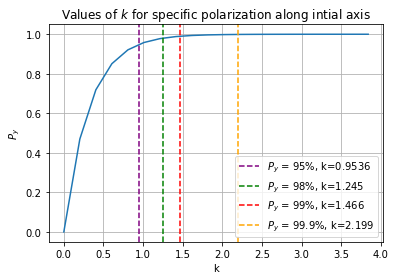

In [119]:
#plotting the polarization along the intial axis in terms of k
def P_straight(k):
    return 1-np.exp(-np.pi*k)

k_arr = np.linspace(0, 20, 100)

plt.plot(k_arr[:20], P_straight(k_arr[:20]))
plt.axvline(x=P_95, color='purple', linestyle='--', label=f"$P_y$ = 95%, k={P_95:.4}")
plt.axvline(x=P_98, color='g', linestyle='--', label=f"$P_y$ = 98%, k={P_98:.4}")
plt.axvline(x=P_99, color='r', linestyle='--', label=f"$P_y$ = 99%, k={P_99:.4}")
plt.axvline(x=P_999, color='orange', linestyle='--', label=f"$P_y$ = 99.9%, k={P_999:.4}")

plt.title("Values of $k$ for specific polarization along intial axis")
plt.xlabel('k')
plt.ylabel('$P_y$')
plt.grid()
plt.legend()
plt.savefig('Photos/Kgraphs_req_straight.jpg')
plt.show()

## The Adiabatic parameter for rotating paths

Final expressions for $P(k)$ after a $\theta$ rotation of the magnetic field. 

In [150]:
def Px(theta, k):
    return k*(1-np.cos(theta*np.sqrt(1+k**2))) / (1+k**2)

def Py(theta, k):
    return (np.cos(theta)*(k**2 + np.cos(theta*np.sqrt(1+k**2))) + \
            np.sqrt(1+k**2)*np.sin(theta)*np.sin(theta*np.sqrt(1+k**2)) )/ (1+k**2)

def Pz(theta, k):
    return np.sin(theta)*(k**2 + np.cos(theta*np.sqrt(1+k**2)))/(1+k**2) - \
           np.cos(theta)*np.sin(theta*np.sqrt(1+k**2))/np.sqrt(1+k**2)

def P_vec(theta, k, LFS=False):
    if LFS:
        P_vector = [Px(theta, k), -Py(theta, k), -Pz(theta, k)]

    else:
        P_vector = [Px(theta, k), Py(theta, k), Pz(theta, k)]
        
    return np.array(P_vector)

def P_tot(theta, k): #this should just stay at 1, which it does
    return np.sqrt( Px(theta, k)**2 +  Py(theta, k)**2 +  Pz(theta, k)**2)


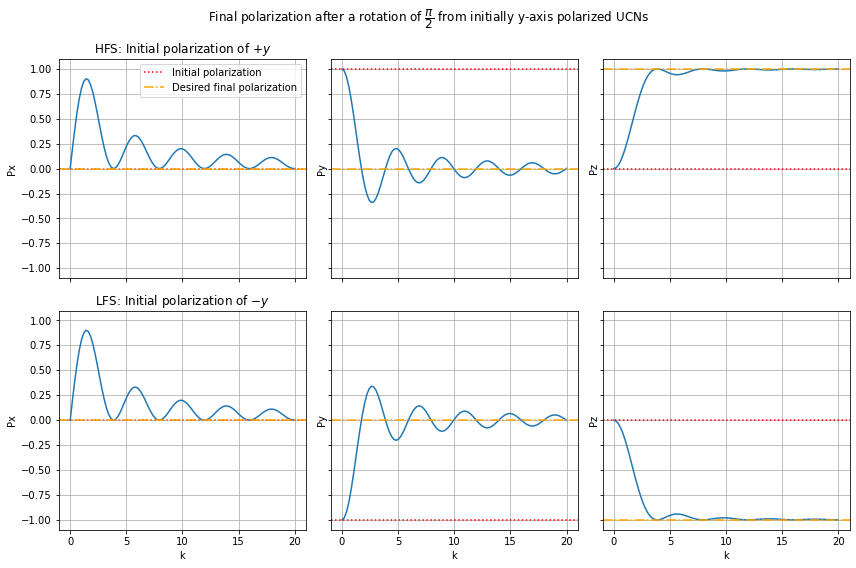

In [164]:
fig, axs = plt.subplots(2, 3, figsize=(12,8), sharex=True, sharey=True)
plt.suptitle("Final polarization after a rotation of $\dfrac{\pi}{2}$ from initially y-axis polarized UCNs")
k_arr = np.linspace(0, 20, 100)

theta_arr = np.pi/2
theta_arr_lab = "\dfrac{\pi}{2}"
direction = [0,1,2]
direction_lab = ["Px", "Py", "Pz"]
#for switching between high and low field seeker intial polarization
LFS_arr = [False, True]
intial_P = [[0, 1, 0], [0, -1, 0]]
intial_P_arr = ["$+y$", "$-y$"]
seekers_arr = ["HFS", "LFS"]

wanted_final_P = [[0, 0, 1],[0, 0, -1]]

j = 0
for P in intial_P:
    axs[j, 0].set_title("{}: Initial polarization of {}".format(seekers_arr[j], intial_P_arr[j]))
    
    for i in direction:
        axs[j, i].plot(k_arr, P_vec(t, k_arr, LFS_arr[j])[i])
        axs[j, i].axhline(y=P[i], color='r', linestyle=':', label="Initial polarization")
        axs[j, i].axhline(y=wanted_final_P[j][i], color='orange', linestyle='-.', label="Desired final polarization")
        axs[j, i].set_ylabel(direction_lab[i])
        axs[j, i].grid()
        
    j += 1

axs[0,0].legend()
axs[1,0].set_xlabel("k")
axs[1,1].set_xlabel("k")
axs[1,2].set_xlabel("k")
plt.tight_layout()
# plt.savefig('Photos/Kgraphs_req.jpg')

plt.show()

In [162]:
#for P> 99%:
Px_sy, Py_sy, Pz_sy = sp.symbols("P_x, P_y, P_z")
P_0 = sp.symbols("P_0")

Protating_x = sp.Eq(Px_sy, P_0*k*(1 - sp.cos(sp.pi*sp.sqrt(k**2 + 1)/2))/(k**2 + 1))
Protating_y = sp.Eq(Py_sy, P_0*sp.sin(sp.pi*sp.sqrt(k**2 + 1)/2)/sp.sqrt(k**2 + 1))
Protating_z = sp.Eq(Pz_sy, P_0*(k**2 + sp.cos(sp.pi*sp.sqrt(k**2 + 1)/2))/(k**2 + 1))

# ou can convert your sympy solution to a numpy-based function, and use scipy to solve numerically.
from scipy.optimize import fsolve

Protating_z = Protating_z.replace(P_0, 1)
display(Protating_z)
Protating_z_np = sp.lambdify(k, Protating_z.rhs, modules=['numpy'])

# print(Protating_z_np(0.1))
precent = [95, 99, 99.9]
zArr = []
for Per in precent:
    #this solves for roots, which is not what I want
    zArr.append(fsolve(Protating_z_np)[0])
    
print(zArr)


Eq(P_z, (k**2 + cos(pi*sqrt(k**2 + 1)/2))/(k**2 + 1))

TypeError: fsolve() missing 1 required positional argument: 'x0'

In [153]:
Protating_z_k, = sp.solve(Protating_z, k)

display(sp.Eq(k, Protating_z_k))

P_95 = float(Pstraight_k.replace(P_s, .95))
P_98 = float(Pstraight_k.replace(P_s, .98))
P_99 = float(Pstraight_k.replace(P_s, .99))
P_999 = float(Pstraight_k.replace(P_s, .999))

print("For P = .99:")
display(sp.Eq(sp.Eq(k, Pstraight_k.replace(P_s, .99)), P_99, evaluate=False))

NotImplementedError: multiple generators [k, cos(pi*sqrt(k**2 + 1)/2)]
No algorithms are implemented to solve equation P_z - (k**2 + cos(pi*sqrt(k**2 + 1)/2))/(k**2 + 1)

IndexError: list index out of range

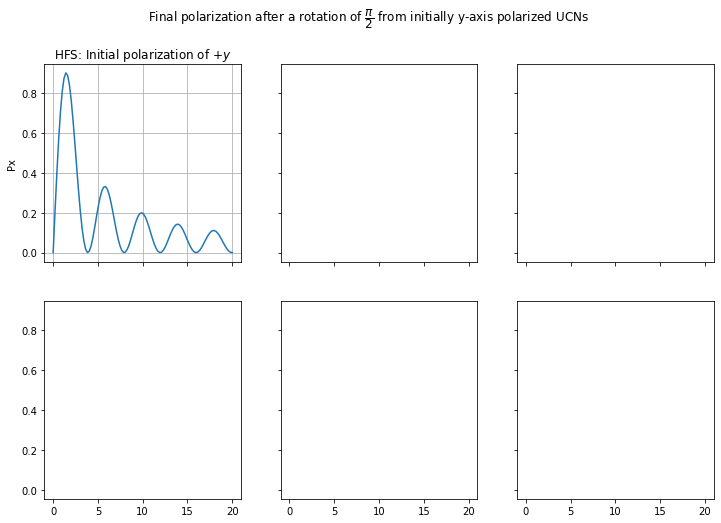

In [163]:
fig, axs = plt.subplots(2, 3, figsize=(12,8), sharex=True, sharey=True)
plt.suptitle("Final polarization after a rotation of $\dfrac{\pi}{2}$ from initially y-axis polarized UCNs")
# Values of $k$ 

j = 0
for P in intial_P:
    axs[j, 0].set_title("{}: Initial polarization of {}".format(seekers_arr[j], intial_P_arr[j]))
    
    for i in direction:
        axs[j, i].plot(k_arr, P_vec(t, k_arr, LFS_arr[j])[i])
        axs[j, i].set_ylabel(direction_lab[i])
        axs[j, i].grid()
        for n, Per in enumerate(precent):
#             print(zArr[n])
            axs[j, i].axvline(x=zArr[n], color='purple', linestyle='--', label=f"$P_y$ = {Per}%, k={zArr[n]:.4}")
        
    j += 1

# plt.axvline(x=P_95, color='purple', linestyle='--', label=f"$P_y$ = 95%, k={P_95:.4}")
# plt.axvline(x=P_98, color='g', linestyle='--', label=f"$P_y$ = 98%, k={P_98:.4}")
# plt.axvline(x=P_99, color='r', linestyle='--', label=f"$P_y$ = 99%, k={P_99:.4}")
# plt.axvline(x=P_999, color='orange', linestyle='--', label=f"$P_y$ = 99.9%, k={P_999:.4}")

axs[0,0].legend()
axs[1,0].set_xlabel("k")
axs[1,1].set_xlabel("k")
axs[1,2].set_xlabel("k")
plt.tight_layout()
plt.savefig('Photos/Kgraphs_req.jpg')
plt.show()

In [7]:
#equation 2 in the CDR - Sect 4.1 for the value of k
def K_equ2(B, dbdx, v_n):
    return gamma_n*B**2 / (v_n*dbdx)

#example values in the CDR - Sect 4.1
print(K_equ2(1e-3, 20e-3 *100, 8))

print(K_equ2(0.1e-3, .2e-3 *100, 8))

11.452948187499999
11.4529481875
